# Regression-Discontinuity-Analysis-on-Bank-Debits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("C:\\Users\\ladli\\OneDrive\\Desktop\\Industrial Project\\bank_data.csv")

In [3]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.shape

(1882, 6)

In [5]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [9]:
strategy_mapping = {
    'Level 0 Recovery': 'L0R',
    'Level 1 Recovery': 'L1R',
    'Level 2 Recovery': 'L2R',
    'Level 3 Recovery': 'L3R',
    'Level 4 Recovery': 'L4R'
}

# Use the replace function to rename the values
df['recovery_strategy'] = df['recovery_strategy'].replace(strategy_mapping)

# Display the updated DataFrame
print(df['recovery_strategy'].unique())


['L0R' 'L1R' 'L2R' 'L3R' 'L4R']


# Exploratory Data Analysis

### Univariate Analysis

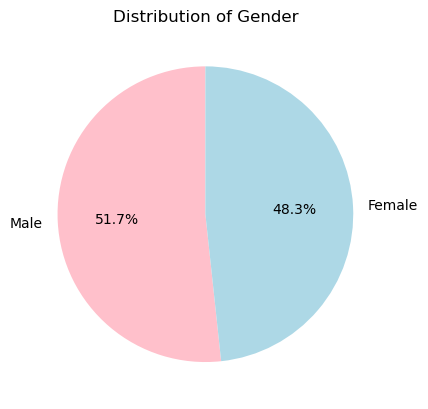

In [10]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
gender_counts = df['sex'].value_counts()

# Pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Distribution of Gender')
plt.show()


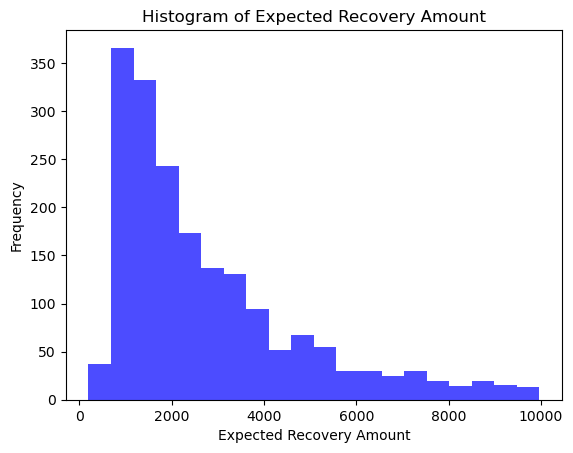

In [11]:
# Histogram for 'expected_recovery_amount'
plt.hist(df['expected_recovery_amount'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Recovery Amount')
plt.show()


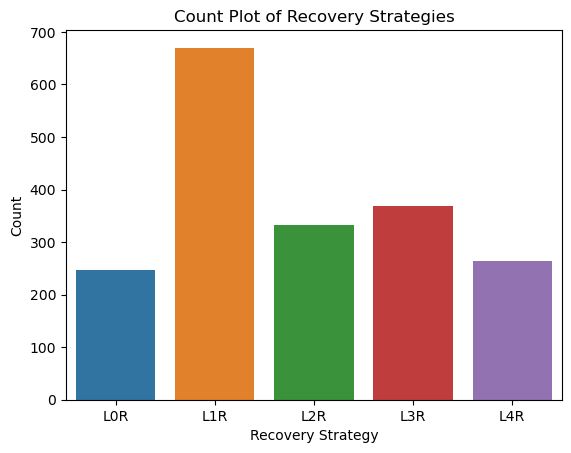

In [12]:
import seaborn as sns

# Count plot for 'recovery_strategy'
sns.countplot(x='recovery_strategy', data=df)
plt.xlabel('Recovery Strategy')
plt.ylabel('Count')
plt.title('Count Plot of Recovery Strategies')
plt.show()



### Bivariate Analysis

In [13]:
df['recovery_strategy'].unique()

array(['L0R', 'L1R', 'L2R', 'L3R', 'L4R'], dtype=object)

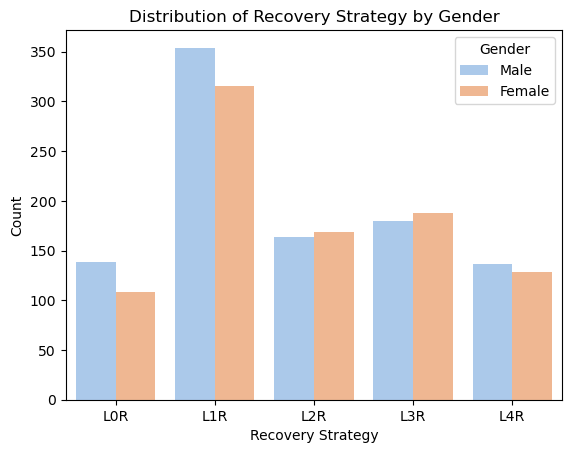

In [14]:
# Create a clustered bar chart
sns.countplot(x='recovery_strategy', hue='sex', data=df, palette='pastel')

# Add labels and a title
plt.xlabel('Recovery Strategy')
plt.ylabel('Count')
plt.title('Distribution of Recovery Strategy by Gender')

# Display the legend
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()


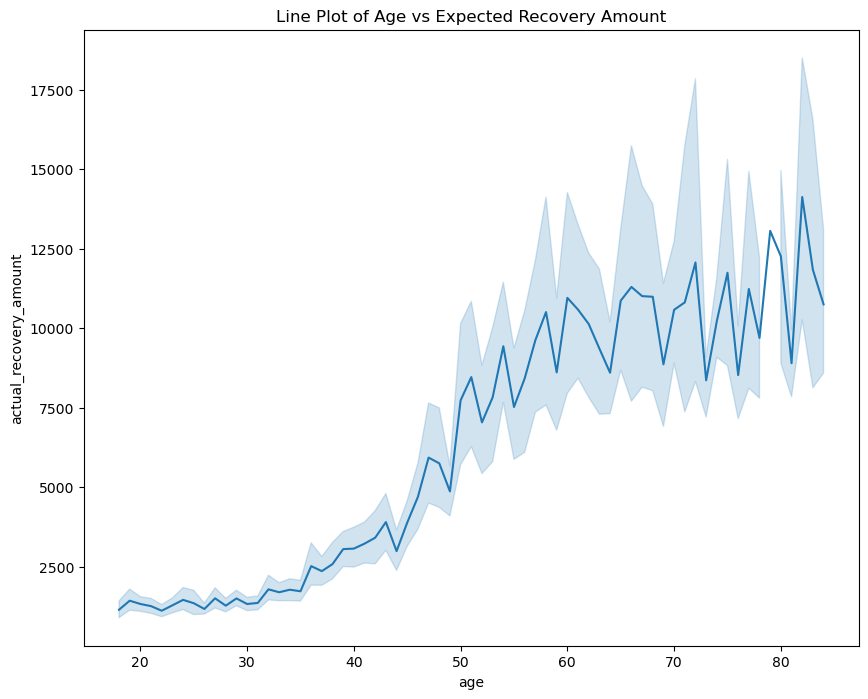

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='actual_recovery_amount', data=df)
plt.title('Line Plot of Age vs Expected Recovery Amount')
plt.show()


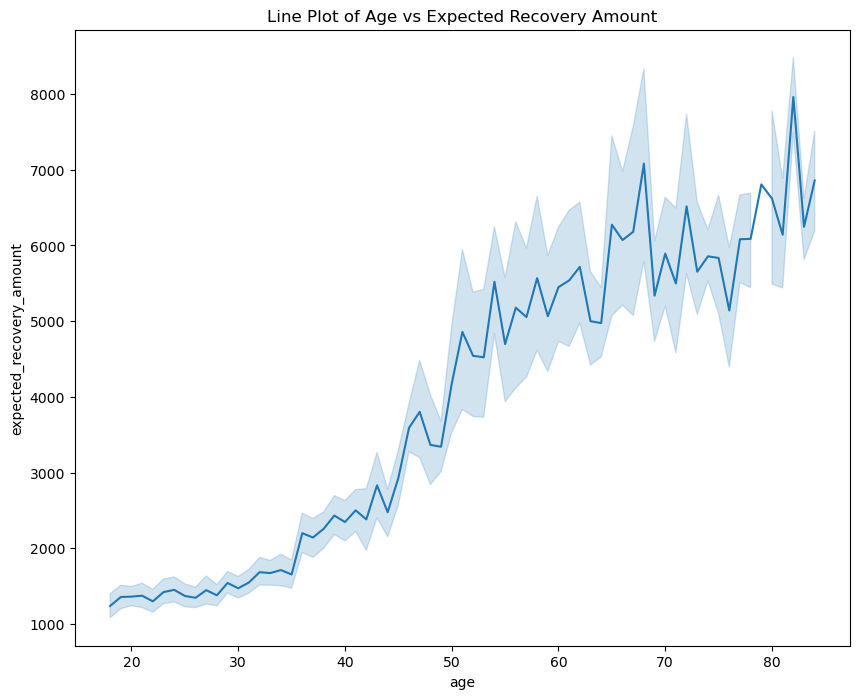

In [16]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='expected_recovery_amount', data=df)
plt.title('Line Plot of Age vs Expected Recovery Amount')
plt.show()

## Multivariate Analysis

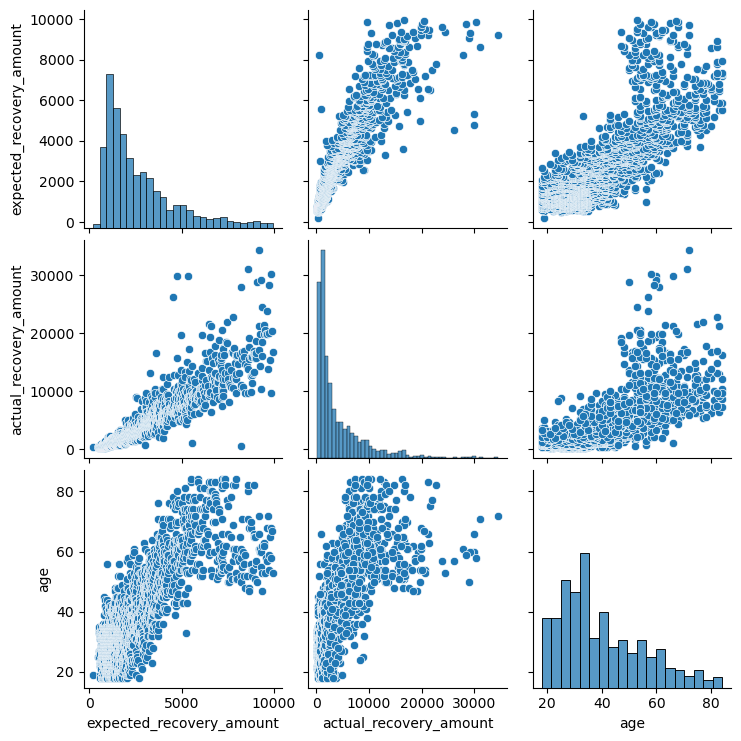

In [17]:
import seaborn as sns

# Pair plot for selected numerical variables
sns.pairplot(df[['expected_recovery_amount', 'actual_recovery_amount', 'age']])
plt.show()


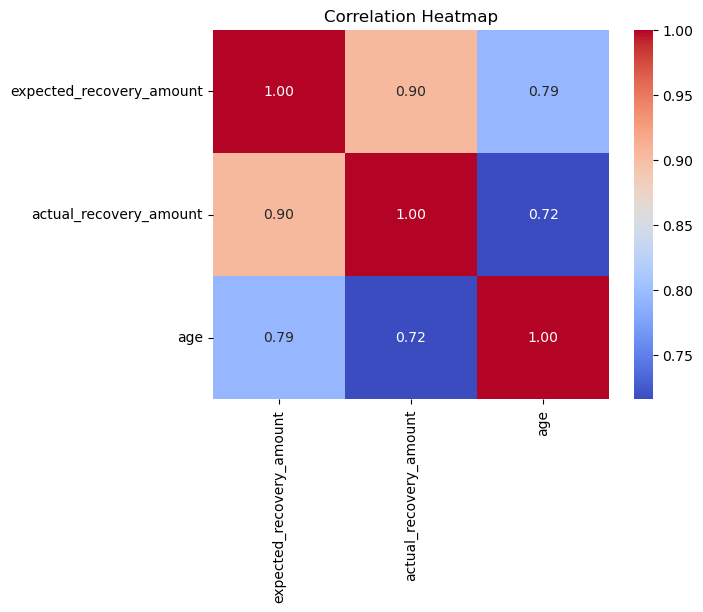

In [18]:
# Compute correlation matrix
correlation_matrix = df[['expected_recovery_amount', 'actual_recovery_amount', 'age']].corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Statistical test: sex vs. expected recovery amount

In [19]:
from scipy.stats import chi2_contingency

# Assuming your dataset is stored in a DataFrame named 'df'

# Define the threshold values
threshold_below = 900
threshold_above = 1100

# Create subsets for customers just below and just above the threshold
below_threshold = df[df['expected_recovery_amount'] < threshold_above]
above_threshold = df[df['expected_recovery_amount'] > threshold_below]

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['expected_recovery_amount'] > 1000)

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the percentage of male customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the percentage of male customers.")


Chi-Square Statistic: 2.1768676619404688
P-Value: 0.14009934427173568
Fail to reject the null hypothesis: There is no significant difference in the percentage of male customers.


## Exploratory graphical analysis: recovery amount

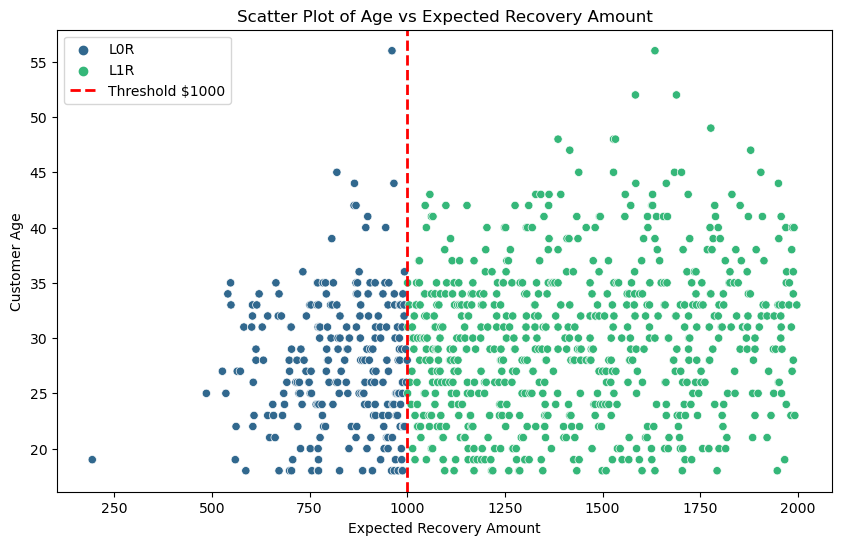

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame named 'df'

# Filter data for the specified range ($0 to $2000)
df_subset = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

# Scatter plot of age as a function of Expected Recovery Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=df_subset, hue='recovery_strategy', palette='viridis')
plt.axvline(x=1000, color='red', linestyle='--', linewidth=2, label='Threshold $1000')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Customer Age')
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
plt.legend()
plt.show()


## Statistical analysis: recovery amount

In [21]:
from scipy.stats import kruskal

# Define the threshold values
threshold_below = 900
threshold_above = 1100

# Create subsets for actual recovery amounts just below and just above the threshold
below_threshold = df[df['expected_recovery_amount'] <= threshold_below]['actual_recovery_amount']
above_threshold = df[df['expected_recovery_amount'] >= threshold_above]['actual_recovery_amount']

# Perform the Kruskal-Wallis test
kruskal_stat, p_value = kruskal(below_threshold, above_threshold)

# Display the results
print(f'Kruskal-Wallis Statistic: {kruskal_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in actual recovery amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in actual recovery amounts.")


Kruskal-Wallis Statistic: 427.418934006625
P-Value: 5.924623031446836e-95
Reject the null hypothesis: There is a significant difference in actual recovery amounts.


In [22]:
from scipy.stats import kruskal
#Define the narrower threshold values
narrow_threshold_below = 950
narrow_threshold_above = 1050

# Create subsets for actual recovery amounts in the narrower range
narrow_below_threshold = df[df['expected_recovery_amount'] <= narrow_threshold_below]['actual_recovery_amount']
narrow_above_threshold = df[df['expected_recovery_amount'] >= narrow_threshold_above]['actual_recovery_amount']

# Perform the Kruskal-Wallis test for the narrow range
narrow_kruskal_stat, narrow_p_value = kruskal(narrow_below_threshold, narrow_above_threshold)

# Display the results for the narrow range
print(f'Kruskal-Wallis Statistic (Narrow Range): {narrow_kruskal_stat}')
print(f'P-Value (Narrow Range): {narrow_p_value}')

# Interpret the results for the narrow range
if narrow_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in actual recovery amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in actual recovery amounts.")


Kruskal-Wallis Statistic (Narrow Range): 499.8530248640682
P-Value (Narrow Range): 1.0231731325092398e-110
Reject the null hypothesis: There is a significant difference in actual recovery amounts.


## Regression modeling: no threshold

In [23]:
import statsmodels.formula.api as smf

In [24]:
import statsmodels.api as sm

# Fit a linear regression model without a threshold
model_without_threshold = smf.ols(formula='actual_recovery_amount ~ expected_recovery_amount', data=df).fit()

# Print the regression results
print(model_without_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:28:26   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Regression modeling: adding true threshold

In [25]:
# Add an indicator of the true threshold to the DataFrame
df['true_threshold'] = np.where(df['expected_recovery_amount'] >= 1000, 1, 0)

# Fit a linear regression model with the true threshold
model_with_true_threshold = smf.ols(formula='actual_recovery_amount ~ expected_recovery_amount + true_threshold', data=df).fit()

# Print the regression results with the true threshold
print(model_with_true_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4241.
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:28:26   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Regression modeling: adjusting the window




In [26]:
import statsmodels.api as sm
import pandas as pd

# Select data within the new window of $950 to $1050 for expected recovery amount
new_window_lower = 950
new_window_upper = 1050

selected_data_new_window = df[(df['expected_recovery_amount'] >= new_window_lower) & (df['expected_recovery_amount'] <= new_window_upper)]

# Create a dummy variable for above and below the threshold
selected_data_new_window['above_threshold'] = (selected_data_new_window['expected_recovery_amount'] > 1000).astype(int)

# Model with an indicator for the true threshold for the new window
model_with_threshold_new_window = sm.OLS(selected_data_new_window['actual_recovery_amount'],
                                         sm.add_constant(selected_data_new_window[['expected_recovery_amount', 'above_threshold']])).fit()

# Display regression summary for the new window
print("Regression Model With Threshold (New Window):")
print(model_with_threshold_new_window.summary())

Regression Model With Threshold (New Window):
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            21:28:26   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

C:\Users\ladli\AppData\Local\Temp\ipykernel_18732\200307046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_new_window['above_threshold'] = (selected_data_new_window['expected_recovery_amount'] > 1000).astype(int)
